<a href="https://colab.research.google.com/github/hkbu-kennycheng/comp3925/blob/main/lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab8 APIs and text analytics

In [69]:
import pandas as pd

# APIs

## Youtube Data API

Youtube Data API provides access to YouTube data like search, video, playlist and more.

In [67]:
!pip install requests

In [87]:
import requests

### Generate API key from google cloud console

https://console.cloud.google.com/

1. Create new project at https://console.cloud.google.com/projectcreate
2. Go to API dashboard at https://console.cloud.google.com/apis/dashboard
3. Searh for Youtube Data API https://console.cloud.google.com/apis/library/browse?q=youtube
4. Click on the result and click `Enable`
5. Click `Credentials` on left panel
6. Click `+ Create Credentials` on the top and select `API key`


### Search video and playlist

https://developers.google.com/youtube/v3/docs/search/list

In [100]:
response = requests.get('https://youtube.googleapis.com/youtube/v3/search?part=snippet&maxResults=25&q=Leon%20Lai&key=API_KEY', headers={ 'Accept': 'application/json' })
rawdata = response.json()
rawdata

{'etag': 'pR98ArcdUSRnR0IvRW0KebIeLT8',
 'items': [{'etag': 'ADknQ83hwcLIGpg3EtmzRQojEa8',
   'id': {'kind': 'youtube#video', 'videoId': '7_3v9NpYLvA'},
   'kind': 'youtube#searchResult',
   'snippet': {'channelId': 'UCsykiwtxpFJsdBHaEhWGXFw',
    'channelTitle': 'Classics Rewind 中文經典金曲',
    'description': '黎明Leon Lai 懷舊經典金曲30首1 - 0:00 今夜妳會不會來2 - 4:11 情深說話未曾講3 - 7:52 夏日傾情4 - 12:02 對不起, 我愛妳5 - 15:50 ...',
    'liveBroadcastContent': 'none',
    'publishTime': '2021-04-15T07:00:01Z',
    'publishedAt': '2021-04-15T07:00:01Z',
    'thumbnails': {'default': {'height': 90,
      'url': 'https://i.ytimg.com/vi/7_3v9NpYLvA/default.jpg',
      'width': 120},
     'high': {'height': 360,
      'url': 'https://i.ytimg.com/vi/7_3v9NpYLvA/hqdefault.jpg',
      'width': 480},
     'medium': {'height': 180,
      'url': 'https://i.ytimg.com/vi/7_3v9NpYLvA/mqdefault.jpg',
      'width': 320}},
    'title': '黎明 Leon Lai 懷舊經典金曲30首: 今夜妳會不會來 / 情深說話未曾講 / 夏日傾情 / 那有一天不想你 / 傻癡癡'}},
  {'etag': 'gi09yWSXuwKQo

Extract the information and wrap in a pandas DataFrame.

In [106]:
leonlaidf = pd.DataFrame([{
  'id':v['id']['videoId'],
  'title':v['snippet']['title'],
  'channel_id': v['snippet']['channelId'],
  'channel_title': v['snippet']['channelTitle']
} for v in rawdata['items']])

leonlaidf

,id,title,channel_id,channel_title
0,7_3v9NpYLvA,黎明 Leon Lai 懷舊經典金曲30首: 今夜妳會不會來 / 情深說話未曾講 / 夏日傾...,UCsykiwtxpFJsdBHaEhWGXFw,Classics Rewind 中文經典金曲
1,wJ_EsSHA8Z8,黎明 Leon Lai - Good Luck,UCif2QXoY4o6sUjVfFqkMYqg,AMusic Official Channel
2,oradrgIoCvY,黎明 Leon Lai - 全身想旅行 Official MV,UCif2QXoY4o6sUjVfFqkMYqg,AMusic Official Channel
3,5WXWMdVVTT8,黎明 Leon Lai - 超平凡人的主題曲 Official MV,UCif2QXoY4o6sUjVfFqkMYqg,AMusic Official Channel
4,MYfUybdXqYg,黎明 Leon Lai - 夏日傾情 (重新唱),UCif2QXoY4o6sUjVfFqkMYqg,AMusic Official Channel
5,0sAq5JKLbn0,LEON演唱會2011,UCflKnpaOqVO6-uq459Nd6xw,Yuen lau
6,B-wgofRsmSY,黎明 Leon Lai - 如果可以再見你,UCQF9S7ii2bn39SvqKfrtkDg,LeonLaiVEVO
7,PGLLhpDfqdM,黎明 Leon Lai - 全日愛,UCQF9S7ii2bn39SvqKfrtkDg,LeonLaiVEVO
8,egj-Ar5VeD0,黎明 Leon Lai - 愈夜愈有機,UCQF9S7ii2bn39SvqKfrtkDg,LeonLaiVEVO
9,JYRRPrabia4,Leon Lai - 黎明 -《我的親愛》MV,UCQF9S7ii2bn39SvqKfrtkDg,LeonLaiVEVO


### Video details

In [107]:
response = requests.get('https://youtube.googleapis.com/youtube/v3/videos?part=snippet%2CcontentDetails%2Cstatistics&id=wJ_EsSHA8Z8&key=API_KEY', headers={ 'Accept': 'application/json' })
response.json()

{'etag': 'LmUmSi5swcl1mCBZI1R5aRcV8dY',
 'items': [{'contentDetails': {'caption': 'false',
    'contentRating': {},
    'definition': 'hd',
    'dimension': '2d',
    'duration': 'PT1M24S',
    'licensedContent': True,
    'projection': 'rectangular'},
   'etag': 'nw4cJZ4yAb6bsNjbJOdvfd27rw4',
   'id': 'wJ_EsSHA8Z8',
   'kind': 'youtube#video',
   'snippet': {'categoryId': '10',
    'channelId': 'UCif2QXoY4o6sUjVfFqkMYqg',
    'channelTitle': 'AMusic Official Channel',
    'defaultAudioLanguage': 'en',
    'description': '音頻在3月6日於Apple Music, iTunes, Spotify, KKBOX, JOOX先有🎵\n\n主唱：黎明\n曲/詞：林日曦\n編/監：何丙\n\n這首歌不會太勵志\n志在於漆黑中講一點小事\n沒陽光的一日\u3000太難的不必堅持\n已病倒\u3000先休息\u3000再試\n\nGood luck to you\n厄運不會太頑固\n等候多兩秒吧\n天會隨時逆轉所有錯誤\n\nGood luck to you\n苦盡甘到了又苦\n黑夜清晨和正午\n這種循環法則很堅固\n\nGood luck to you\nGood luck to you\n\n\r\nAMusic Official Website: http://www.amusic.hk/\r\nAMusic Facebook: http://on.fb.me/12eLEcC\r\nAMusic Weibo: http://weibo.com/paciwoodamusic',
    'liveBroadcastContent': 'none',
    

In [113]:
for id in leonlaidf['id'].tolist():
  response = requests.get(f'https://youtube.googleapis.com/youtube/v3/videos?part=snippet%2CcontentDetails%2Cstatistics&id={id}&key=API_KEY', headers={ 'Accept': 'application/json' })
  print(response.json())

{'kind': 'youtube#videoListResponse', 'etag': 'HS-1LsOL9JQR3VWLZZFjNBY9YOg', 'items': [{'kind': 'youtube#video', 'etag': 'N4tozu4eCoGggyy5qumLsBVJq_Y', 'id': '7_3v9NpYLvA', 'snippet': {'publishedAt': '2021-04-15T07:00:01Z', 'channelId': 'UCsykiwtxpFJsdBHaEhWGXFw', 'title': '黎明 Leon Lai 懷舊經典金曲30首: 今夜妳會不會來 / 情深說話未曾講 / 夏日傾情 / 那有一天不想你 / 傻癡癡', 'description': '黎明 Leon Lai 懷舊經典金曲30首\n\n1 - 0:00 今夜妳會不會來\n2 - 4:11 情深說話未曾講\n3 - 7:52 夏日傾情\n4 - 12:02 對不起, 我愛妳\n5 - 15:50 那有一天不想你\n6 - 20:31 傻癡癡\n7 - 24:41 我的親愛\n8 - 29:02 但願不只是朋友\n9 - 33:19 100樣可能\n10 - 37:07 相逢在雨中\n11 - 40:58 沒名字的歌,無名字的你\n12 - 45:18 只要為我愛一天\n13 - 49:24 人在黎明\n14 - 53:43 夏日方程式\n15 - 57:42 如果這是情\n16 - 1:01:45 我來自北京\n17 - 1:05:58 情是我所有\n18 - 1:11:21 夜夜夢中見\n19 - 1:16:07 特別的歌給特別的你\n20 - 1:20:52 無名份的浪漫\n21 - 1:25:41 永相依\n22 - 1:29:47 末世紀之戀\n23 - 1:34:06 是愛是緣\n24 - 1:37:51 天才白痴往日情\n25 - 1:42:10 夜變得精彩\n26 - 1:46:26 因你在此\n27 - 1:50:56 午夜夢迴\n28 - 1:55:17 兩心知\n29 - 1:59:41 Oh! 夜\n30 - 2:03:49 你令我著迷\n\n► 訂閱Youtube頻道收聽更多經典金曲：https://bit.ly/2Lr0tw

Showing Youtube video in noetbook

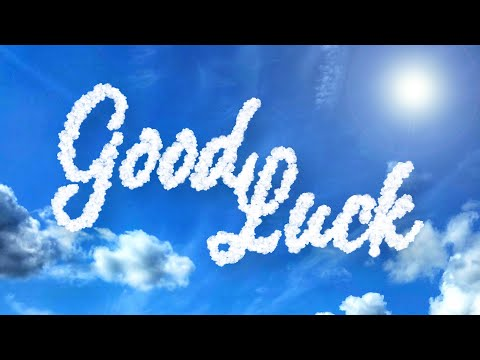

In [125]:
from IPython.display import YouTubeVideo
YouTubeVideo('wJ_EsSHA8Z8')

## Finnhub

Finnhub is a a free to use financial data API provides. It provides news, stocks, currencies, and crypto data of financial market. Some of their APIs are in real-time.

https://finnhub.io/

After register an account, you could get the APP key from dashboard at https://finnhub.io/dashboard.

In [66]:
!pip install finnhub_python

### Market news

In [114]:
import finnhub
finnhub_client = finnhub.Client(api_key="API_KEY")

finnhubnewsdf = pd.DataFrame(finnhub_client.general_news('general', min_id=0))
finnhubnewsdf

,category,datetime,headline,id,image,related,source,summary,url
0,top news,1647402840,Key Ally of Pakistan Leader Khan Says He's '10...,7062763,https://data.bloomberglp.com/company/sites/2/2...,,Bloomberg,Pakistan Prime Minister Imran Khan’s governmen...,https://www.bloomberg.com/news/articles/2022-0...
1,top news,1647401020,Hong Kong Tycoon Sells UBS London Headquarters...,7062762,https://data.bloomberglp.com/company/sites/2/2...,,Bloomberg,A Hong Kong company owned by one of Asia’s ric...,https://www.bloomberg.com/news/articles/2022-0...
2,top news,1647400828,Mexico Reporter Is Second Killed This Year at ...,7062764,https://data.bloomberglp.com/company/sites/2/2...,,Bloomberg,Authorities are investigating the death of a j...,https://www.bloomberg.com/news/articles/2022-0...
3,top news,1647400591,Pandemic Erased Over 9 Million Jobs in Southea...,7062756,https://data.bloomberglp.com/company/sites/2/2...,,Bloomberg,The coronavirus pandemic obliterated 9.3 milli...,https://www.bloomberg.com/news/articles/2022-0...
4,top news,1647400234,"Norwegian Luxury Cruise Ship Runs Aground, Can...",7062754,https://data.bloomberglp.com/company/sites/2/2...,,Bloomberg,Thousands of passengers on a Norwegian Cruise ...,https://www.bloomberg.com/news/articles/2022-0...
...,...,...,...,...,...,...,...,...,...
95,top news,1647365134,"Hycroft Options, Stock Trading Volume Went Cra...",7062556,https://data.bloomberglp.com/company/sites/2/2...,,Bloomberg,,https://www.bloomberg.com/news/articles/2022-0...
96,top news,1647365068,Bernard Arnault Signals He's Ready to Extend H...,7062610,https://data.bloomberglp.com/company/sites/2/2...,,Bloomberg,Billionaire Bernard Arnault is signaling he’s ...,https://www.bloomberg.com/news/articles/2022-0...
97,top news,1647364820,Trafigura Seeks PE Funding as Commodity Surge ...,7062540,https://data.bloomberglp.com/company/sites/2/2...,,Bloomberg,,https://www.bloomberg.com/news/articles/2022-0...
98,top news,1647364800,The Wall Street Journal: Big Four accounting f...,7062559,https://images.mktw.net/im-505347/social,,MarketWatch,Regulators are carrying out a sweeping investi...,https://www.marketwatch.com/story/big-four-acc...


### Candle stick

In [71]:
!pip install altair vega_datasets

In [85]:
import altair as alt
from vega_datasets import data
from time import gmtime, strftime, time

rawdata = finnhub_client.stock_candles('AAPL', 'D', int(time() - 3600 * 24 * 90), int(time()))
source = pd.DataFrame([{
    'date':pd.to_datetime(t, unit='s'),
    'open':rawdata['o'][i],
    'high':rawdata['h'][i],
    'low':rawdata['l'][i],
    'close':rawdata['c'][i]
} for i, t in enumerate(rawdata['t'])])

open_close_color = alt.condition("datum.open <= datum.close",
                                 alt.value("#06982d"),
                                 alt.value("#ae1325"))

base = alt.Chart(source).encode(
    alt.X('date:T',
          axis=alt.Axis(
              format='%Y/%m/%d',
              labelAngle=-45,
              title='Date'
          )
    ),
    color=open_close_color
)

rule = base.mark_rule().encode(
    alt.Y(
        'low:Q',
        title='Price',
        scale=alt.Scale(zero=False),
    ),
    alt.Y2('high:Q')
)

bar = base.mark_bar().encode(
    alt.Y('open:Q'),
    alt.Y2('close:Q')
)

rule + bar

alt.LayerChart(...)

## data.gov.hk

https://data.gov.hk/en/

`data.gov.hk` contiains data from various department under the government open-data policy. There is an API builder provided by the platform, here we could wrap it as a function to generate api links.

![](https://url2img-web.herokuapp.com/aHR0cHM6Ly9kYXRhLmdvdi5oay9lbi8=)

In [123]:
import requests
from time import gmtime, strftime, time
import urllib.parse

def datagovhkAPILinks(file_url = 'http://www.chp.gov.hk/files/misc/enhanced_sur_covid_19_eng.csv', start = '20200101', end = strftime('%Y%m%d', gmtime(time() - 3600 * 24))):
  response = requests.get(f'https://api.data.gov.hk/v1/historical-archive/list-file-versions?url={urllib.parse.quote_plus(file_url)}&start={start}&end={end}')
  json = response.json()
  return [f'https://api.data.gov.hk/v1/historical-archive/get-file?url={urllib.parse.quote_plus(file_url)}&time=' + t for t in json['timestamps']]

### Daily count of vaccination by age groups

https://data.gov.hk/en-data/dataset/hk-fhb-fhbcovid19-vaccination-rates-over-time-by-age

In [124]:
urls = datagovhkAPILinks('https://www.fhb.gov.hk/download/opendata/COVID19/vaccination-rates-over-time-by-age.csv')
urls

['https://api.data.gov.hk/v1/historical-archive/get-file?url=https%3A%2F%2Fwww.fhb.gov.hk%2Fdownload%2Fopendata%2FCOVID19%2Fvaccination-rates-over-time-by-age.csv&time=20211207-1036',
 'https://api.data.gov.hk/v1/historical-archive/get-file?url=https%3A%2F%2Fwww.fhb.gov.hk%2Fdownload%2Fopendata%2FCOVID19%2Fvaccination-rates-over-time-by-age.csv&time=20211214-1043',
 'https://api.data.gov.hk/v1/historical-archive/get-file?url=https%3A%2F%2Fwww.fhb.gov.hk%2Fdownload%2Fopendata%2FCOVID19%2Fvaccination-rates-over-time-by-age.csv&time=20211229-1110',
 'https://api.data.gov.hk/v1/historical-archive/get-file?url=https%3A%2F%2Fwww.fhb.gov.hk%2Fdownload%2Fopendata%2FCOVID19%2Fvaccination-rates-over-time-by-age.csv&time=20220104-1102',
 'https://api.data.gov.hk/v1/historical-archive/get-file?url=https%3A%2F%2Fwww.fhb.gov.hk%2Fdownload%2Fopendata%2FCOVID19%2Fvaccination-rates-over-time-by-age.csv&time=20220110-1055',
 'https://api.data.gov.hk/v1/historical-archive/get-file?url=https%3A%2F%2Fwww.f

In [121]:
pd.read_csv(urls[0])

,Date,Age Group,sex,Sinovac 1st dose,Sinovac 2nd dose,Sinovac 3rd dose,BioNTech 1st dose,BioNTech 2nd dose,BioNTech 3rd dose
0,26/2/2021,0-19,F,13,0,0,0,0,0
1,26/2/2021,0-19,M,10,0,0,0,0,0
2,26/2/2021,20-29,F,45,0,0,0,0,0
3,26/2/2021,20-29,M,47,0,0,0,0,0
4,26/2/2021,30-39,F,101,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
4520,5/12/2021,60-69,M,134,140,383,133,119,384
4521,5/12/2021,70-79,F,100,51,96,99,40,94
4522,5/12/2021,70-79,M,54,46,114,86,33,103
4523,5/12/2021,80 and above,F,65,27,33,60,20,14


In [122]:
pd.read_csv(urls[-1])

,Date,Age Group,Sex,Sinovac 1st dose,Sinovac 2nd dose,Sinovac 3rd dose,BioNTech 1st dose,BioNTech 2nd dose,BioNTech 3rd dose
0,2021-02-22,30-39,M,1,0,0,0,0,0
1,2021-02-22,40-49,F,1,0,0,0,0,0
2,2021-02-22,40-49,M,11,0,0,0,0,0
3,2021-02-22,50-59,F,2,0,0,0,0,0
4,2021-02-22,50-59,M,10,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
6111,2022-03-13,60-69,M,136,578,957,85,292,1412
6112,2022-03-13,70-79,F,202,483,421,72,207,530
6113,2022-03-13,70-79,M,143,354,362,56,132,427
6114,2022-03-13,80 and above,F,301,445,185,60,99,185


# Text analysis with Texthero

https://texthero.org/

https://url2img-web.herokuapp.com/aHR0cHM6Ly90ZXh0aGVyby5vcmcv

In [ ]:
!pip install -U texthero

     |████████████████████████████████| 1.5 MB 5.8 MB/s 
     |████████████████████████████████| 235 kB 47.4 MB/s 
     |████████████████████████████████| 749 kB 46.5 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2019.12.20
    Uninstalling regex-2019.12.20:
      Successfully uninstalled regex-2019.12.20
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [ ]:
import texthero as hero
import pandas as pd

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Loading dataset

In [ ]:
!curl https://gist.githubusercontent.com/hkbu-kennycheng/b95757c385ac5e49a1abb1434a966f6c/raw/5110cce1df181d67411c949c304655572740d0b9/pnk.csv > pnk.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4228k  100 4228k    0     0  4945k      0 --:--:-- --:--:-- --:--:-- 4939k


In [ ]:
pnkdf = pd.read_csv('pnk.csv', index_col=0)
pnkdf

,name,id,url,pic,price,specialoffer,brand,category,variant,variantname,...,organic,eshoponly,healthyfat,crustacean,Product Details,Origin,Product Warnings,Product Usage,Storage Condition,Ingredients
0,Alkaline Water 9.0 (random Pick),499585,https://www.parknshop.com/en/alkaline-water-9-...,https://www.parknshop.com/medias/sys_master/fr...,9.0,NaN,WATSONS,Water,499585,420ML,...,False,False,False,False,- Smart way to hydrate your body- Helps to neu...,Hong Kong,This product contains minerals and is electrol...,Consume shortly after opening.,Keep in a cool dry place away from direct sunl...,"Water, Ocean Mineral Concentrate"
1,Alkaline Water 9.0 (case) (420ml X 24 Bottles),378829,https://www.parknshop.com/en/alkaline-water-9-...,https://www.parknshop.com/medias/sys_master/fr...,168.0,NaN,WATSONS,"Water,Bottled Water",378829,24X420ML,...,False,False,False,False,- Helps neutralize acidity-Help the body detox...,Hong Kong,Keep in a cool dry place away from direct sunl...,drink,Keep in a cool dry place away from direct sunl...,"Water, Ocean Mineral Concentrate"
2,L Type Interdental Brush 0.6mm - 6pcs,805629,https://www.parknshop.com/en/l-type-interdenta...,https://www.parknshop.com/medias/sys_master/fr...,13.9,$20.8 / 2pcs,WATSONS,Dental Accessories & Denture,805629,6S,...,False,False,False,False,WATSONS ORAL CARE RANGE IS SPECIALLY DESIGNED ...,China,Do not force the interdental brush between tee...,1. PUT THE INTERDENTAL BRUSH BETWEEN THE TEETH...,"STORE IN A COOL, DRY PLACE AWAY FROM DIRECT SU...",NaN
3,L Type Interdental Brush 0.8mm 6pcs,805630,https://www.parknshop.com/en/l-type-interdenta...,https://www.parknshop.com/medias/sys_master/fr...,13.9,$20.8 / 2pcs,WATSONS,Dental Accessories & Denture,805630,6S,...,False,False,False,False,WATSONS ORAL CARE RANGE IS SPECIALLY DESIGNED ...,China,Do not force the interdental brush between tee...,1. PUT THE INTERDENTAL BRUSH BETWEEN THE TEETH...,"STORE IN A COOL, DRY PLACE AWAY FROM DIRECT SU...",NaN
4,I Type Interdental Brush 0.7mm 5pcs,805627,https://www.parknshop.com/en/i-type-interdenta...,https://www.parknshop.com/medias/sys_master/fr...,10.0,$15.0 / 2pcs,WATSONS,Dental Accessories & Denture,805627,5S,...,False,False,False,False,WATSONS ORAL CARE RANGE IS SPECIALLY DESIGNED ...,China,Do not force the interdental brush between tee...,1. PUT THE INTERDENTAL BRUSH BETWEEN THE TEETH...,"STORE IN A COOL, DRY PLACE AWAY FROM DIRECT SU...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6722,Kitchen Towel 9inch,365593,https://www.parknshop.com/en/kitchen-towel-9in...,https://www.parknshop.com/medias/sys_master/fr...,25.9,MONEYBACK MEMBER OFFER,BEST BUY,NaN,365593,6S,...,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
6723,Chauzhou Style Fish Balls,51761,https://www.parknshop.com/en/chauzhou-style-fi...,https://www.parknshop.com/medias/sys_master/fr...,8.4,MONEYBACK MEMBER OFFER,JIU LONG CHENG ZHAI,Seafood Balls,51761,170G/PKT,...,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
6724,Alkaline Ion Water,483353,https://www.parknshop.com/en/alkaline-ion-wate...,https://www.parknshop.com/medias/sys_master/fr...,19.9,MONEYBACK MEMBER OFFER,KIRIN,Water,483353,2L,...,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
6725,Mushroom Pork Ball,55251,https://www.parknshop.com/en/mushroom-pork-bal...,https://www.parknshop.com/medias/sys_master/fr...,13.9,MONEYBACK MEMBER OFFER,JIU LONG CHENG ZHAI,Meat Balls,55251,170G,...,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN


## Explore data

In [ ]:
pnkdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6727 entries, 0 to 6726
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               6720 non-null   object 
 1   id                 6727 non-null   int64  
 2   url                6727 non-null   object 
 3   pic                6727 non-null   object 
 4   price              6726 non-null   float64
 5   specialoffer       2527 non-null   object 
 6   brand              6624 non-null   object 
 7   category           6049 non-null   object 
 8   variant            6727 non-null   int64  
 9   variantname        6726 non-null   object 
 10  topseller          6727 non-null   bool   
 11  fairtrade          6727 non-null   bool   
 12  organic            6727 non-null   bool   
 13  eshoponly          6727 non-null   bool   
 14  healthyfat         6727 non-null   bool   
 15  crustacean         6727 non-null   bool   
 16  Product Details    5056 

In [ ]:
pnkdf['Storage Condition'].describe()

count                                                 4168
unique                                                 845
top       Store in a cool dry place, avoid direct sunlight
freq                                                   179
Name: Storage Condition, dtype: object

In [ ]:
pd.Series(pnkdf['Storage Condition'].unique())

0      Keep in a cool dry place away from direct sunl...
1      STORE IN A COOL, DRY PLACE AWAY FROM DIRECT SU...
2                                                    NaN
3      Keep in cool and dry place, avoid direct sunli...
4      Keep frozen at -18°C. Do not refreeze after th...
                             ...                        
841                      Please keep in a cool dry place
842                              Frozen (-18C or below )
843                               KEEP IN COOL DRY PLACE
844    PLEASE STORE THIS PRODUCT IN A COOL DRY PLACE ...
845       Store in a cool, dry place away from humidity.
Length: 846, dtype: object

## Data cleaning

In [ ]:
pnkdf['Storage Condition'] = pnkdf['Storage Condition'].pipe(hero.clean)

In [ ]:
pnkdf['Storage Condition'].describe()

count     6727
unique     642
top           
freq      2560
Name: Storage Condition, dtype: object

In [ ]:
pnkdf['name'] = pnkdf['name'].pipe(hero.clean)
pnkdf['brand'] = pnkdf['brand'].pipe(hero.clean)
pnkdf['category'] = pnkdf['category'].pipe(hero.clean)
pnkdf['variantname'] = pnkdf['variantname'].pipe(hero.clean)
pnkdf['Product Details'] = pnkdf['Product Details'].pipe(hero.clean)
pnkdf['Origin'] = pnkdf['Origin'].pipe(hero.clean)
pnkdf['Product Warnings'] = pnkdf['Product Warnings'].pipe(hero.clean)
pnkdf['Product Usage'] = pnkdf['Product Usage'].pipe(hero.clean)
#pnkdf['Storage Condition'] = pnkdf['Storage Condition'].pipe(hero.clean)
pnkdf['Ingredients'] = pnkdf['Ingredients'].pipe(hero.clean)

pnkdf

,name,id,url,pic,price,specialoffer,brand,category,variant,variantname,...,organic,eshoponly,healthyfat,crustacean,Product Details,Origin,Product Warnings,Product Usage,Storage Condition,Ingredients
0,alkaline water random pick,499585,https://www.parknshop.com/en/alkaline-water-9-...,https://www.parknshop.com/medias/sys_master/fr...,9.0,NaN,watsons,water,499585,420ml,...,False,False,False,False,smart way hydrate body helps neutralize acidit...,hong kong,product contains minerals electrolyzed platini...,consume shortly opening,keep cool dry place away direct sunlight consu...,water ocean mineral concentrate
1,alkaline water case 420ml x bottles,378829,https://www.parknshop.com/en/alkaline-water-9-...,https://www.parknshop.com/medias/sys_master/fr...,168.0,NaN,watsons,water bottled water,378829,24x420ml,...,False,False,False,False,helps neutralize acidity help body detox easil...,hong kong,keep cool dry place away direct sunlight consu...,drink,keep cool dry place away direct sunlight consu...,water ocean mineral concentrate
2,l type interdental brush 6mm 6pcs,805629,https://www.parknshop.com/en/l-type-interdenta...,https://www.parknshop.com/medias/sys_master/fr...,13.9,$20.8 / 2pcs,watsons,dental accessories denture,805629,6s,...,False,False,False,False,watsons oral care range specially designed fam...,china,force interdental brush teeth. turn bend inter...,put interdental brush teeth move back forth ge...,store cool dry place away direct sunlight,
3,l type interdental brush 8mm 6pcs,805630,https://www.parknshop.com/en/l-type-interdenta...,https://www.parknshop.com/medias/sys_master/fr...,13.9,$20.8 / 2pcs,watsons,dental accessories denture,805630,6s,...,False,False,False,False,watsons oral care range specially designed fam...,china,force interdental brush teeth. turn bend inter...,put interdental brush teeth move back forth ge...,store cool dry place away direct sunlight,
4,type interdental brush 7mm 5pcs,805627,https://www.parknshop.com/en/i-type-interdenta...,https://www.parknshop.com/medias/sys_master/fr...,10.0,$15.0 / 2pcs,watsons,dental accessories denture,805627,5s,...,False,False,False,False,watsons oral care range specially designed fam...,china,force interdental brush teeth. turn bend inter...,put interdental brush teeth move back forth ge...,store cool dry place away direct sunlight,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6722,kitchen towel 9inch,365593,https://www.parknshop.com/en/kitchen-towel-9in...,https://www.parknshop.com/medias/sys_master/fr...,25.9,MONEYBACK MEMBER OFFER,best buy,,365593,6s,...,False,False,False,False,,,,,,
6723,chauzhou style fish balls,51761,https://www.parknshop.com/en/chauzhou-style-fi...,https://www.parknshop.com/medias/sys_master/fr...,8.4,MONEYBACK MEMBER OFFER,jiu long cheng zhai,seafood balls,51761,170g pkt,...,False,False,False,False,,,,,,
6724,alkaline ion water,483353,https://www.parknshop.com/en/alkaline-ion-wate...,https://www.parknshop.com/medias/sys_master/fr...,19.9,MONEYBACK MEMBER OFFER,kirin,water,483353,2l,...,False,False,False,False,,,,,,
6725,mushroom pork ball,55251,https://www.parknshop.com/en/mushroom-pork-bal...,https://www.parknshop.com/medias/sys_master/fr...,13.9,MONEYBACK MEMBER OFFER,jiu long cheng zhai,meat balls,55251,170g,...,False,False,False,False,,,,,,


## Feature engineering

### Extract packed location from `Origin`

In [ ]:
pnkdf['packed'] = pnkdf['Origin'].str.split('packed').apply(lambda x: x[-1])
pnkdf['packed'].describe()

count      6727
unique      109
top       china
freq       1794
Name: packed, dtype: object

In [ ]:
pnkdf['Origin'] = pnkdf['Origin'].str.split('packed').apply(lambda x: x[0])

In [ ]:
pnkdf['Origin'].unique()

array(['hong kong', 'china', 'belgium', 'thailand', 'korea', 'italy',
       'france', 'product canada ', 'made australian oats', 'taiwan',
       'product usa', 'product australia', 'vietnam', 'singapore',
       'united states', 'norway', '', 'malaysia',
       'product european union ', 'product european union',
       'taiwan province china', 'indonesia', 'product malaysia ',
       'australia', 'brzail', 'canada', 'sri lanka', 'japan', 'uk', 'us',
       'united kingdom', 'denmark', 'spain', 'yarra valley australia',
       'germany', 'south africa', 'chile', 'turkey', 'champagne france',
       'scotland', 'new zealand', 'p r c', 'austrilia', 'philippines',
       'gambia', 'mexico', 'austria', 'poland', 'others', 'espana',
       'republic korea', 'japan shizuoka prefecture', 'switzerland',
       'netherlands', 'brazil', 'israel', 'california',
       'made australian oat bran', 'cyprus', 'indonesian', 'ireland',
       'puerto rico', 'republic ireland', 'india', 'slovenia',
  

In [ ]:
pnkdf['Origin'] = pnkdf['Origin'].str.strip().replace('product ','')

In [ ]:
pnkdf

,name,id,url,pic,price,specialoffer,brand,category,variant,variantname,...,eshoponly,healthyfat,crustacean,Product Details,Origin,Product Warnings,Product Usage,Storage Condition,Ingredients,packed
0,alkaline water random pick,499585,https://www.parknshop.com/en/alkaline-water-9-...,https://www.parknshop.com/medias/sys_master/fr...,9.0,NaN,watsons,water,499585,420ml,...,False,False,False,smart way hydrate body helps neutralize acidit...,hong kong,product contains minerals electrolyzed platini...,consume shortly opening,keep cool dry place away direct sunlight consu...,water ocean mineral concentrate,hong kong
1,alkaline water case 420ml x bottles,378829,https://www.parknshop.com/en/alkaline-water-9-...,https://www.parknshop.com/medias/sys_master/fr...,168.0,NaN,watsons,water bottled water,378829,24x420ml,...,False,False,False,helps neutralize acidity help body detox easil...,hong kong,keep cool dry place away direct sunlight consu...,drink,keep cool dry place away direct sunlight consu...,water ocean mineral concentrate,hong kong
2,l type interdental brush 6mm 6pcs,805629,https://www.parknshop.com/en/l-type-interdenta...,https://www.parknshop.com/medias/sys_master/fr...,13.9,$20.8 / 2pcs,watsons,dental accessories denture,805629,6s,...,False,False,False,watsons oral care range specially designed fam...,china,force interdental brush teeth. turn bend inter...,put interdental brush teeth move back forth ge...,store cool dry place away direct sunlight,,china
3,l type interdental brush 8mm 6pcs,805630,https://www.parknshop.com/en/l-type-interdenta...,https://www.parknshop.com/medias/sys_master/fr...,13.9,$20.8 / 2pcs,watsons,dental accessories denture,805630,6s,...,False,False,False,watsons oral care range specially designed fam...,china,force interdental brush teeth. turn bend inter...,put interdental brush teeth move back forth ge...,store cool dry place away direct sunlight,,china
4,type interdental brush 7mm 5pcs,805627,https://www.parknshop.com/en/i-type-interdenta...,https://www.parknshop.com/medias/sys_master/fr...,10.0,$15.0 / 2pcs,watsons,dental accessories denture,805627,5s,...,False,False,False,watsons oral care range specially designed fam...,china,force interdental brush teeth. turn bend inter...,put interdental brush teeth move back forth ge...,store cool dry place away direct sunlight,,china
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6722,kitchen towel 9inch,365593,https://www.parknshop.com/en/kitchen-towel-9in...,https://www.parknshop.com/medias/sys_master/fr...,25.9,MONEYBACK MEMBER OFFER,best buy,,365593,6s,...,False,False,False,,,,,,,
6723,chauzhou style fish balls,51761,https://www.parknshop.com/en/chauzhou-style-fi...,https://www.parknshop.com/medias/sys_master/fr...,8.4,MONEYBACK MEMBER OFFER,jiu long cheng zhai,seafood balls,51761,170g pkt,...,False,False,False,,,,,,,
6724,alkaline ion water,483353,https://www.parknshop.com/en/alkaline-ion-wate...,https://www.parknshop.com/medias/sys_master/fr...,19.9,MONEYBACK MEMBER OFFER,kirin,water,483353,2l,...,False,False,False,,,,,,,
6725,mushroom pork ball,55251,https://www.parknshop.com/en/mushroom-pork-bal...,https://www.parknshop.com/medias/sys_master/fr...,13.9,MONEYBACK MEMBER OFFER,jiu long cheng zhai,meat balls,55251,170g,...,False,False,False,,,,,,,


In [ ]:
pnkdf[pnkdf['variantname'].str.count('x') > 0]

,name,id,url,pic,price,specialoffer,brand,category,variant,variantname,...,eshoponly,healthyfat,crustacean,Product Details,Origin,Product Warnings,Product Usage,Storage Condition,Ingredients,packed
1,alkaline water case 420ml x bottles,378829,https://www.parknshop.com/en/alkaline-water-9-...,https://www.parknshop.com/medias/sys_master/fr...,168.0,NaN,watsons,water bottled water,378829,24x420ml,...,False,False,False,helps neutralize acidity help body detox easil...,hong kong,keep cool dry place away direct sunlight consu...,drink,keep cool dry place away direct sunlight consu...,water ocean mineral concentrate,hong kong
5,alkaline water case,463844,https://www.parknshop.com/en/alkaline-water-9-...,https://www.parknshop.com/medias/sys_master/fr...,156.0,NaN,watsons,water bottled water,463844,12x1 2l,...,False,False,False,,hong kong,,,,,hong kong
17,wasabi seaweed,362538,https://www.parknshop.com/en/wasabi-seaweed/p/...,https://www.parknshop.com/medias/sys_master/fr...,12.9,$12.9 / 2pcs,select,seaweed,362538,sx5g,...,False,False,False,,korea,package contains silica gel drying agent eat k...,,store cool dry place avoid direct sunlight,seaweed corn oil sesame oil salt olive oil was...,korea
20,seaweed,359870,https://www.parknshop.com/en/seaweed/p/BP_359870,https://www.parknshop.com/medias/sys_master/fr...,12.9,$12.9 / 2pcs,select,seaweed,359870,sx5g,...,False,False,False,,korea,package contains silica gel drying agent eat k...,,store cool dry place avoid direct sunlight,seaweed corn oil sesame oil salt olive oil bam...,korea
27,extendable window wiper,309718,https://www.parknshop.com/en/extendable-window...,https://www.parknshop.com/medias/sys_master/fr...,42.9,NaN,select,brooms mops refills,309718,5x78cm,...,False,False,False,extendable window wiper,china,,,,,china
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6684,gomtang noodles,321606,https://www.parknshop.com/en/gomtang/p/BP_321606,https://www.parknshop.com/medias/sys_master/fr...,37.0,MONEYBACK MEMBER OFFER,paldo,instant noodles,321606,102gx5,...,False,False,False,,,,,,,
6685,kotex herbal soft slim wing 41cm 8s tp,481986,https://www.parknshop.com/en/herbal-soft-slim-...,https://www.parknshop.com/medias/sys_master/fr...,60.5,BUY MORE SAVE MORE,kotex,feminine care,481986,8sx2,...,False,False,False,,,,,,,
6693,comfort soft slim 41cm 8s tp,449520,https://www.parknshop.com/en/comfort-soft-slim...,https://www.parknshop.com/medias/sys_master/fr...,49.3,BUY MORE SAVE MORE,kotex,feminine care,449520,2x8s,...,False,False,False,,,,,,,
6697,white slim wing xx long tp,271651,https://www.parknshop.com/en/white-slim-wing-x...,https://www.parknshop.com/medias/sys_master/fr...,47.8,BUY MORE SAVE MORE,kotex,feminine care,271651,8s x2,...,False,False,False,,,,,,,


### Character count in `Product Details`

In [ ]:
pnkdf['detail_chars'] = pnkdf['Product Details'].str.count('').sort_values()

### Noun pharse in `Product Details`

In [ ]:
pnkdf['Product Details'][0]

'smart way hydrate body helps neutralize acidity helps facilitate alkaline water base perfectly balanced formula electrolytes help keep cells happy'

In [ ]:
pnkdf['Product Details'].pipe(hero.nlp.noun_chunks)[0]

[('smart way', 'NP', 0, 9),
 ('hydrate body', 'NP', 10, 22),
 ('acidity', 'NP', 40, 47),
 ('alkaline water base', 'NP', 65, 84),
 ('perfectly balanced formula electrolytes', 'NP', 85, 124),
 ('cells', 'NP', 135, 140)]

# Visualization

## Wordcloud

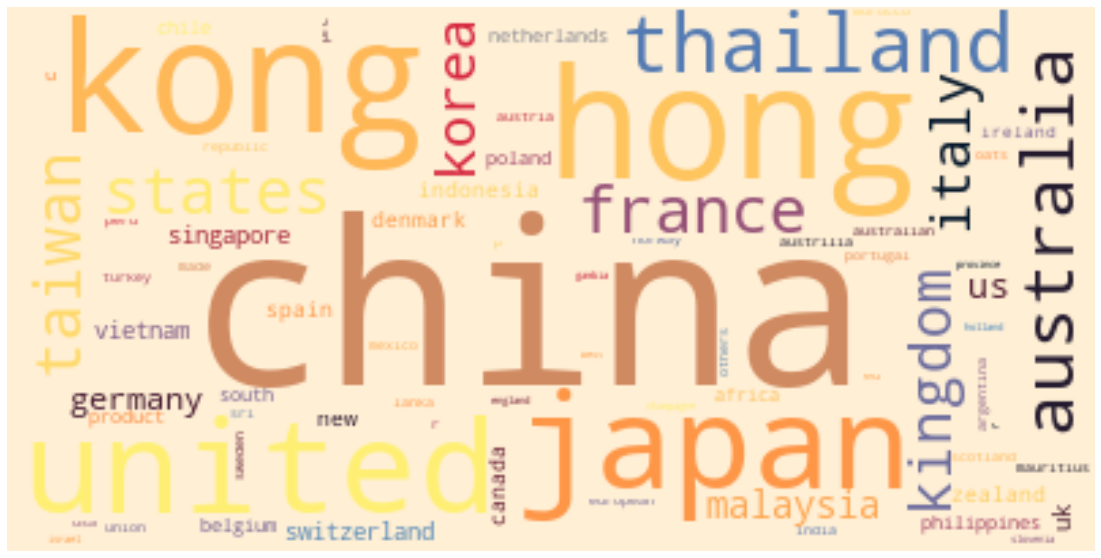

In [ ]:
hero.visualization.wordcloud(pnkdf['Origin'])

## Corpus associations with scattertext

https://github.com/JasonKessler/scattertext

In [126]:
!pip install scattertext
!spacy download en

     |████████████████████████████████| 12.0 MB 685 kB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [127]:
import spacy
import scattertext as st

In [128]:
pnkdf['Product Details']

0       smart way hydrate body helps neutralize acidit...
1       helps neutralize acidity help body detox easil...
2       watsons oral care range specially designed fam...
3       watsons oral care range specially designed fam...
4       watsons oral care range specially designed fam...
                              ...                        
6722                                                     
6723                                                     
6724                                                     
6725                                                     
6726                                                     
Name: Product Details, Length: 6727, dtype: object

In [129]:
pnkdf['topseller_str'] = pnkdf['topseller'].replace(True,'True').replace(False,'False')

In [135]:
corpus = st.CorpusFromPandas(pnkdf,
                             category_col='topseller_str',
                             text_col='name',
                             nlp=spacy.load("en")).build().get_unigram_corpus().remove_infrequent_words(minimum_term_count=6)

In [131]:
corpus.get_term_freq_df()

,False freq,True freq
term,,
alkaline,22,7
water,86,51
random,29,29
pick,30,21
alkaline water,3,1
...,...,...
fish balls,0,1
alkaline ion,1,0
ion water,1,0


In [133]:
html = st.produce_scattertext_explorer(
    corpus,
    category='True', category_name='Best seller', not_category_name='Normal',
    minimum_term_frequency=6, pmi_threshold_coefficient=0,
    width_in_pixels=1000,
    transform=st.Scalers.dense_rank
)

In [134]:
from IPython.core.display import display, HTML

display(HTML(html))


# Exercise

## WordCloud

Please make a wordcloud image using the summary column in Market News data from finnhub. You could make use of `finnhubnewsdf` in previous cell.

## Corpus associations

There are news from different source in `finnhubnewsdf`, let's categorize it into `Bloomberg` and `Others`. After that, visualize the corpus associations with text in `summary` column.